# Projet EP
## 1 - Nettoyage des données

Affichage première ligne des données. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chemin vers le fichier Excel
file_path = '/Users/benjamincordebar/Desktop/2A/S8/EP/Projet/EP/Copie de Dataset-M.xlsx'

# Chargement du fichier
try:
    data = pd.read_excel(file_path)
    print(data.head())  # Afficher les premières lignes pour inspecter les données
except Exception as e:
    print("Erreur lors du chargement du fichier:", e)


   Deg  Mo   GO  CO  CR   P1  PW       T3P  T1  Ready
0    0   1  0.0   0   0  0.0   0  111.3349  20      0
1    0   1  0.0   0   0  0.0   0  111.3349  20      0
2    0   1  0.0   0   0  0.0   0  111.3349  20      0
3    0   1  0.0   0   0  0.0   0  111.3349  20      0
4    0   1  0.0   0   0  0.0   0  111.3349  20      0


Affichage d'un résumé statistique des colonnes. 

In [2]:
print(data.describe())

                Deg            Mo            GO            CO            CR  \
count  90849.000000  90849.000000  90849.000000  90849.000000  90849.000000   
mean       0.601349      1.161378     21.210086     13.283096     18.277097   
std        0.489623      0.367881     26.841001    154.466628    154.813860   
min        0.000000      1.000000  -3276.800000 -32768.000000 -32768.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000     20.000000     14.000000     30.000000   
75%        1.000000      1.000000     40.800000     27.000000     34.000000   
max        1.000000      2.000000     83.800000     53.000000     50.000000   

                 P1            PW           T3P            T1         Ready  
count  90849.000000  90849.000000  9.084900e+04  90849.000000  90849.000000  
mean       0.282454     17.099792 -5.977561e+06     34.143612      0.542417  
std        1.568754    154.887774  1.274051e+09    154

Visualisation de la distribution des données. 

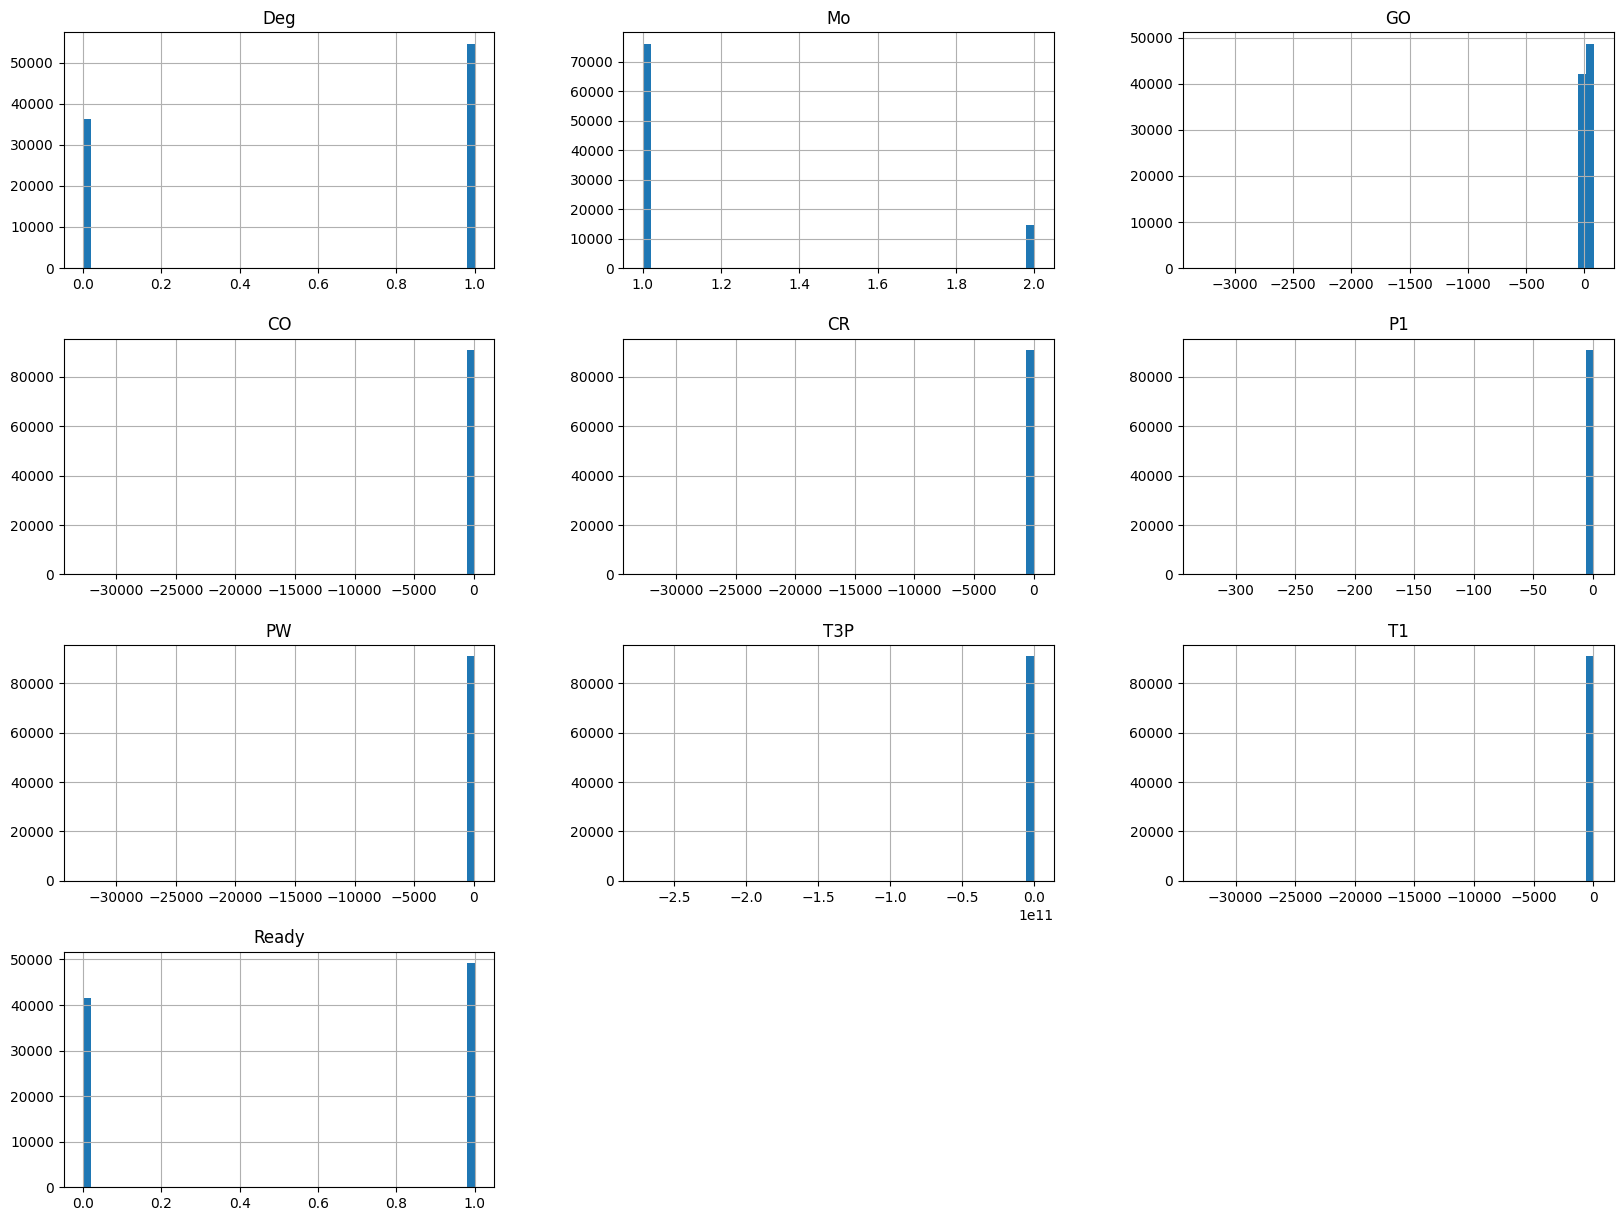

In [3]:
data.hist(bins=50, figsize=(20,15))    # width : 20 pouces, height : 15 pouces
plt.show()


# Affichage évolution des données dans le temps.

In [4]:
# Création d'une série temporelle en secondes
try:
    # Définir la date de départ
    start_date = '2024-01-01 00:00:00'
    
    # Créer la plage de dates en secondes
    data['Time'] = pd.date_range(start=start_date, periods=len(data), freq='s')
    
    # Définir cette colonne comme index
    data.set_index('Time', inplace=True)
    
    # Afficher les premières lignes pour vérifier
    print(data.head())
    
except Exception as e:
    print("Erreur:", e)

                     Deg  Mo   GO  CO  CR   P1  PW       T3P  T1  Ready
Time                                                                   
2024-01-01 00:00:00    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:01    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:02    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:03    0   1  0.0   0   0  0.0   0  111.3349  20      0
2024-01-01 00:00:04    0   1  0.0   0   0  0.0   0  111.3349  20      0


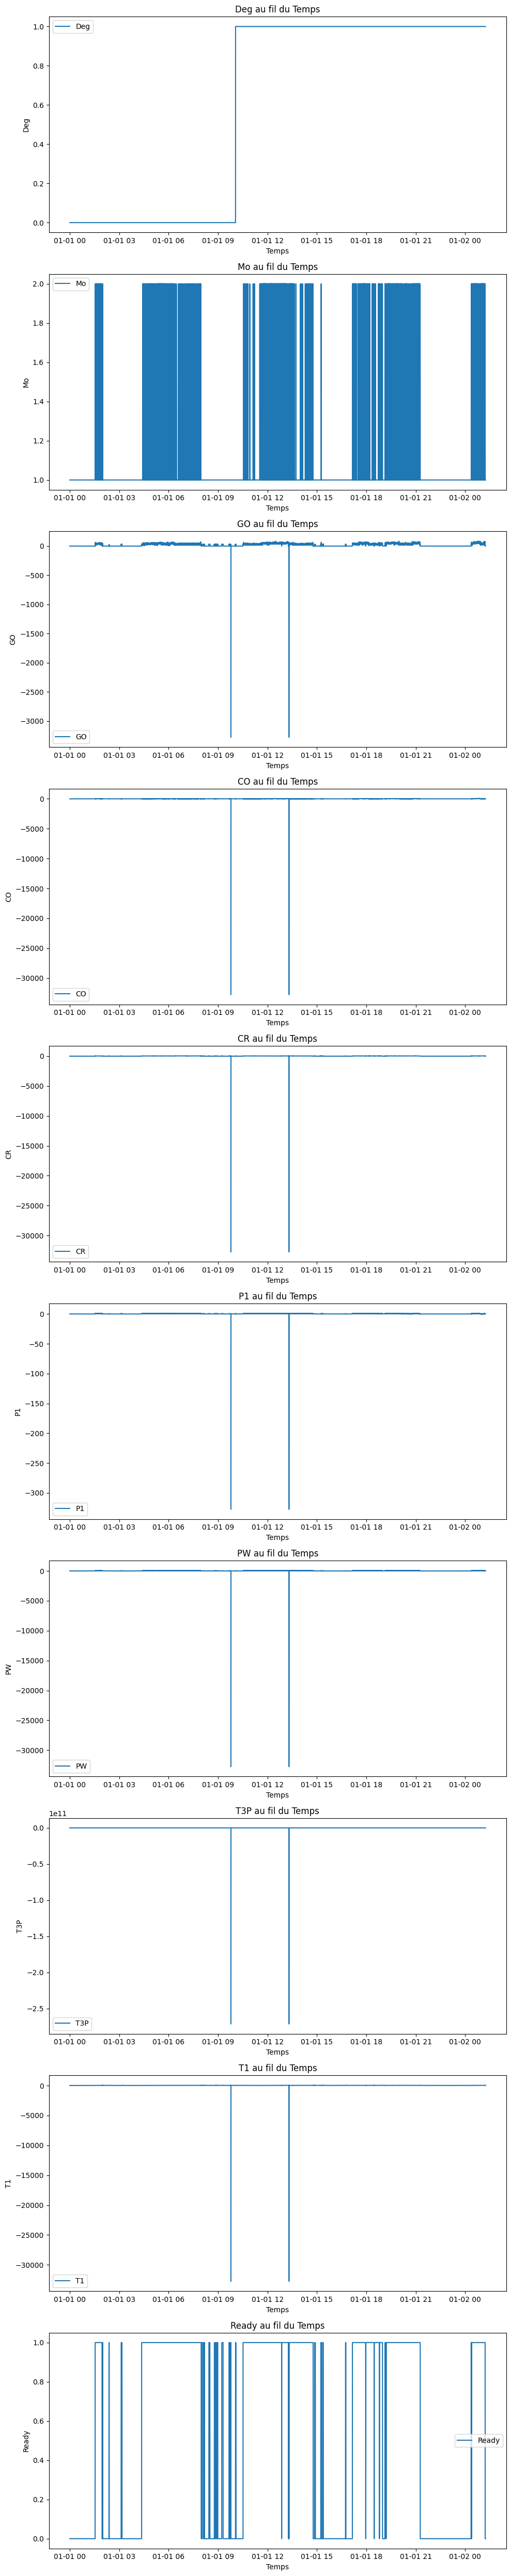

In [5]:
# Nombre de sous-graphiques
num_plots = len(data.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(data.columns):
    axes[i].plot(data.index, data[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# Élimination de données abérantes.

### Méthode des Écarts Interquartiles (IQR)

L'IQR mesure la dispersion statistique et est utilisée pour construire des boxplots. Les données points qui se situent en dehors de 1.5 fois l'IQR à partir du premier ou du troisième quartile sont généralement considérées comme aberrantes.

In [6]:
import pandas as pd

# Calcul de l'IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour définir les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR - 1
upper_bound = Q3 + 1.5 * IQR + 1

# Filtrer les données pour garder seulement les valeurs non aberrantes
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
print("taille d'origine:", data.shape)
print("taille filtrée:", filtered_data.shape)


taille d'origine: (90849, 10)
taille filtrée: (90849, 10)


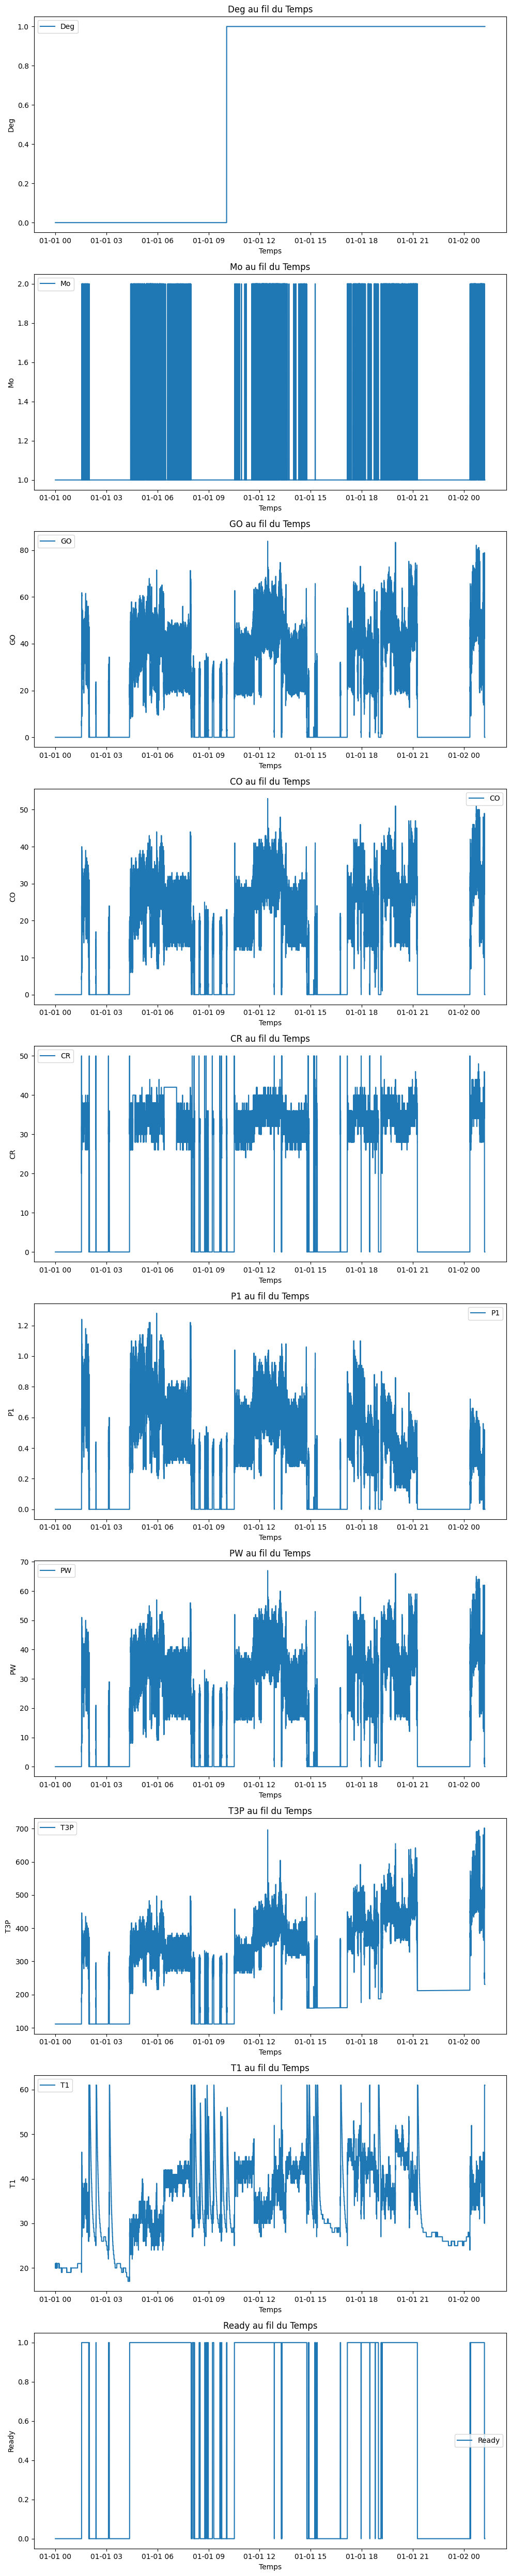

In [7]:
# Nombre de sous-graphiques
num_plots = len(filtered_data.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(filtered_data.columns):
    axes[i].plot(filtered_data.index, filtered_data[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Problème : pour Mo cela ne marche pas car Mo prends la valeur 1 ou 2, il la méthode IQR enlève Mo=2.
Solution : rajouter -1 et +1 dans les limites. Cela n'est pas génant car les valeurs abérantes sont très éloignées des autres valeurs. 

### Autre Solution : Méthodes Basées sur la Densité

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : identifie  clusters de points de données denses et marquer ceux qui sont en dehors de ces clusters comme des outliers.

### Enlever les périodes d'arrêt

In [8]:
filtered_data2 = filtered_data[filtered_data['Ready'] != 0]
print("Taille originale du DataFrame:", len(filtered_data))
print("Taille après filtration:", len(filtered_data2))

Taille originale du DataFrame: 90849
Taille après filtration: 49278


### Enlever 30 points après les temps d'arrêt.

In [9]:
# Ajout d'une colonne temporaire qui marque les redémarrages
filtered_data2['is_restart'] = (filtered_data2['PW'].shift(1) == 1) & (filtered_data2['PW'] > 1)

# Initialiser une liste pour garder les indices à exclure
indices_to_exclude = []

# Parcourir le DataFrame pour ajouter les indices de redémarrage et les 29 suivants
for index in filtered_data2[filtered_data2['is_restart']].index:
    # Créer un range de Timestamps à exclure
    end_time = index + pd.Timedelta(seconds=28)  # Ajout de 28 secondes à l'index de redémarrage pour obtenir 29 points de données au total
    indices_to_exclude.extend(pd.date_range(start=index, end=end_time, freq='s'))

# Assurer que les indices à exclure sont uniques et triés
indices_to_exclude = sorted(set(indices_to_exclude))

# Filtrer le DataFrame pour exclure les indices identifiés
filtered_data3 = filtered_data2.drop(indices_to_exclude, errors='ignore')  # Utiliser errors='ignore' pour éviter les erreurs si certains indices ne sont pas présents

# Enlever la colonne temporaire
filtered_data3.drop('is_restart', axis=1, inplace=True)

# Affichage des tailles pour vérification
print("Taille originale du DataFrame:", len(filtered_data2))
print("Taille après filtration:", len(filtered_data3))


Taille originale du DataFrame: 49278
Taille après filtration: 49278


/var/folders/jj/rn2bgqq11gjc0ccflxysbkk40000gn/T/ipykernel_25145/4211326012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['is_restart'] = (filtered_data2['PW'].shift(1) == 1) & (filtered_data2['PW'] > 1)


### Enlever les bruits : Filtrage de Bas Niveau (Low-Pass)

In [10]:
# from scipy.signal import butter, filtfilt

# def low_pass_filter(data, cutoff, fs, order=5):
#     # Définir les paramètres du filtre
#     nyq = 0.5 * fs  # Fréquence de Nyquist
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

# # Paramètres du filtre
# cutoff = 0.1  # fréquence de coupure (le nombre de mesures par unité de temps)
# fs = 1        # fréquence d'échantillonnage

# # Application du filtre à chaque colonne numérique
# filtered_data4 = filtered_data3
# for column in filtered_data4.columns:
#     if filtered_data4[column].dtype in [np.float64, np.int64]:  # vérifiez que la colonne est numérique
#         filtered_data4[column + '_filtered'] = low_pass_filter(filtered_data4[column], cutoff, fs, order=5)

# # Affichage des tailles pour vérification
# print("Taille originale du DataFrame:", len(filtered_data3))
# print("Taille après filtration:", len(filtered_data4))

Cela ne change rien même quand je reduis la fréquence de coupure -> à revoir ou supp

# 2 - Choisir un indicateur de performance (paramètre de sortie)

Pour cela, nous regardons les données nettoyées : 

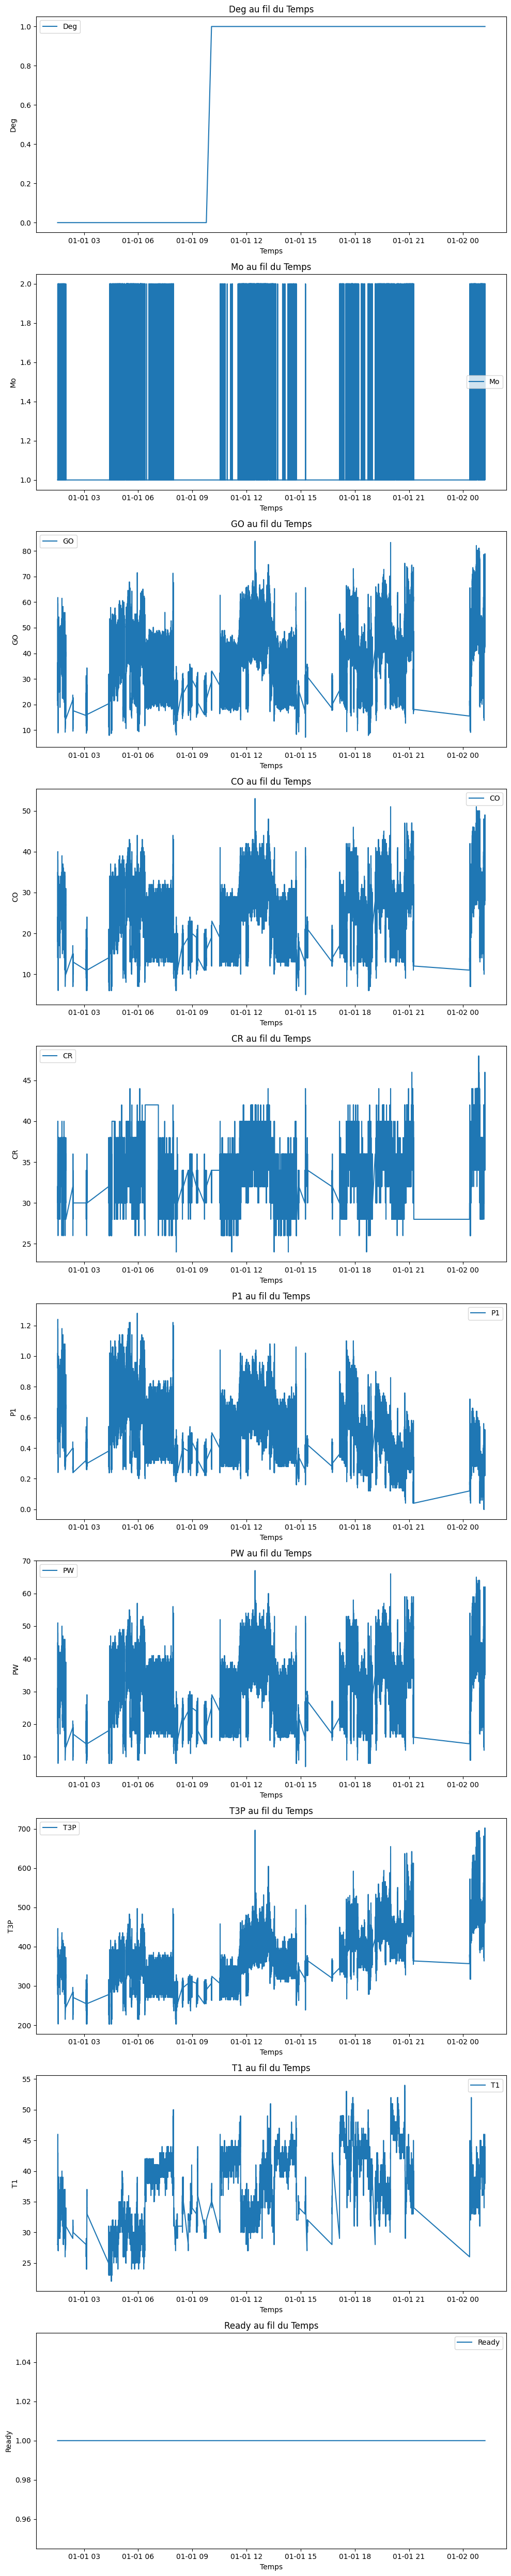

In [11]:
# Nombre de sous-graphiques
num_plots = len(filtered_data3.columns)

# Créer une figure pour accueillir tous les plots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Boucler sur toutes les colonnes et tracer chacune
for i, column in enumerate(filtered_data3.columns):
    axes[i].plot(filtered_data3.index, filtered_data3[column], label=column)
    axes[i].set_title(f'{column} au fil du Temps')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Temps')
    axes[i].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Nous pouvons constater : 
- La puissance du moteur (PW) à un comportement constant tout au long de l'étude. Ce qui peut induire que la manière de l'utilisation de la voiture à été assez constante. 
- Tp3 semble croître, P1 diminuer, GO semble un petit peu croître. 

Nous allons donc prendre comme indicateur de performance entre Tp3, P1, GO, celui qui varie le plus.

## Étude de la variation de Tp3, P1 et GO dans le temps. 

#### Analyse statistique de base
Analyser la variation relative de chaque paramètre en calculant le coefficient de variation (CV), qui est l'écart-type divisé par la moyenne. Le paramètre avec le CV le plus élevé est celui qui varie le plus relativement.

In [12]:
df = filtered_data3 # new name for the DataFrame

moyenne = df.mean()
ecart_type = df.std()

cv = (ecart_type / moyenne) * 100

print("Coefficient de variation (%) :")
print(cv)


Coefficient de variation (%) :
Deg      70.024793
Mo       35.234254
GO       35.325729
CO       32.924741
CR       10.628784
P1       38.967424
PW       32.839189
T3P      19.893361
T1       15.386501
Ready     0.000000
dtype: float64


Nous pouvons constater : 
- P1 est le paramêtre variant relativement le plus parmis Tp3, P1, GO.

Nous choisissons donc P1 comme indicateur de performance (paramètre de sortie).

# 3 - Choisir les facteurs d'influence (paramètres en entrée)

 D'après l'énoncé il faut en choisir un parmis Mo,CO,CR,T1.
 Néanmois, puisque nous faisons ici un réseau de neurones, nous rajoutons le paramètre 'Deg' et 'temps' à l'étude. 
 Pour 'temps' nous allons  rajouter une colonne.

### Ajouter une colonne temps 

In [13]:
# Add a new column for "Purchase Time" where each row corresponds to one second
df['Temps'] = range(1, len(df) + 1)

# Display the updated dataframe
df.head()

,Deg,Mo,GO,CO,CR,P1,PW,T3P,T1,Ready,Temps
Time,,,,,,,,,,,
2024-01-01 01:32:21,0,1,28.1,19.0,32.0,0.48,24.0,306.7195,28.0,1,1
2024-01-01 01:32:22,0,1,30.5,20.0,32.0,0.52,26.0,311.4609,28.0,1,2
2024-01-01 01:32:23,0,1,26.9,18.0,30.0,0.46,23.0,301.7011,28.0,1,3
2024-01-01 01:32:24,0,1,27.8,19.0,30.0,0.48,24.0,306.7195,29.0,1,4
2024-01-01 01:32:25,0,1,29.1,20.0,32.0,0.50,25.0,311.4609,29.0,1,5


### Édute de la corrélation des paramètres d'entrées avec le paramètre de sortie (corrcoef).

[[ 1.          0.57877293  0.74529834  0.55173075 -0.09103553 -0.13224771
  -0.30858357]
 [ 0.57877293  1.          0.78024048  0.56302931  0.01209279  0.19609221
   0.23124021]
 [ 0.74529834  0.78024048  1.          0.69842305  0.09368526  0.25832688
   0.27942393]
 [ 0.55173075  0.56302931  0.69842305  1.          0.01393055 -0.04077729
   0.05889481]
 [-0.09103553  0.01209279  0.09368526  0.01393055  1.          0.51460106
   0.53499599]
 [-0.13224771  0.19609221  0.25832688 -0.04077729  0.51460106  1.
   0.81381091]
 [-0.30858357  0.23124021  0.27942393  0.05889481  0.53499599  0.81381091
   1.        ]]


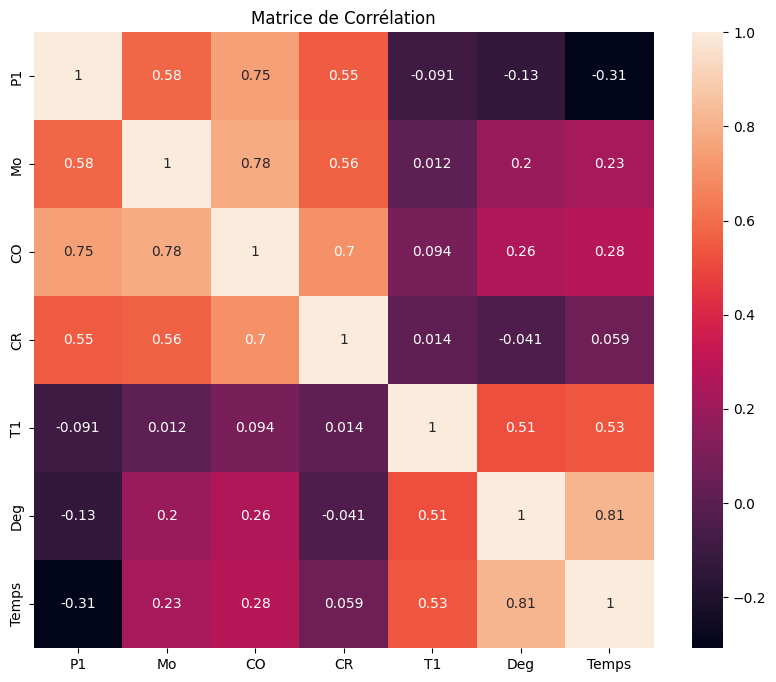

In [14]:
# Selection of the columns to keep
data = df[['P1', 'Mo', 'CO', 'CR', 'T1','Deg','Temps']]

# Calculer la matrice de corrélation
correlation_matrix = np.corrcoef(data.T)  # Transposer pour corriger l'orientation

# Afficher la matrice de corrélation
print(correlation_matrix)

# Créer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.title('Matrice de Corrélation')
plt.show()


La matrice de corrélation nous donne les coefficients de corrélation entre chaque paire de variables. Les valeurs proches de 1 ou -1 indiquent une forte corrélation positive ou négative, respectivement.

Ce ne marche pas bien, sommes-nous sûr qu'il n'y a pas de données manquantes dans notre data ? 

In [15]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

P1       0
Mo       0
CO       0
CR       0
T1       0
Deg      0
Temps    0
dtype: int64


Il en manque. Nous choisissons d'enlever les lignes où des données sont manquantes. 

In [16]:
# Supprimer les lignes avec des valeurs manquantes
data_clean = data.dropna()
print(data_clean.isnull().sum())

P1       0
Mo       0
CO       0
CR       0
T1       0
Deg      0
Temps    0
dtype: int64


Regardons à présent les variances des paramètres (variables) car une variance nulle pourrait empêcher le calcule de la matrice de corrélation. 

In [17]:
print(data.var())

P1       4.291964e-02
Mo       2.090045e-01
CO       7.166146e+01
CR       1.343861e+01
T1       3.424492e+01
Deg      2.207672e-01
Temps    2.023642e+08
dtype: float64


Pas de variance nulle. Gagné !

### Calcule avec les données nettoyées la matrice de corrélation

In [18]:
# Utiliser des données nettoyées pour le calcul de 
# data = df[['P1', 'Mo', 'CO', 'CR', 'T1','Deg','Temps']]
correlation_matrix_clean = np.corrcoef(data_clean.T)
print(correlation_matrix_clean)

[[ 1.          0.57877293  0.74529834  0.55173075 -0.09103553 -0.13224771
  -0.30858357]
 [ 0.57877293  1.          0.78024048  0.56302931  0.01209279  0.19609221
   0.23124021]
 [ 0.74529834  0.78024048  1.          0.69842305  0.09368526  0.25832688
   0.27942393]
 [ 0.55173075  0.56302931  0.69842305  1.          0.01393055 -0.04077729
   0.05889481]
 [-0.09103553  0.01209279  0.09368526  0.01393055  1.          0.51460106
   0.53499599]
 [-0.13224771  0.19609221  0.25832688 -0.04077729  0.51460106  1.
   0.81381091]
 [-0.30858357  0.23124021  0.27942393  0.05889481  0.53499599  0.81381091
   1.        ]]


La matrice de corrélation nous donne les coefficients de corrélation entre chaque paire de variables. Les valeurs proches de 1 ou -1 indiquent une forte corrélation positive ou négative, respectivement.

Nous pouvons constater : 
- Une forte corrélation entre P1 et CO, Mo et CO. 
- Une bonne corrélation entre CO et CR.

En considérant que notre indicateur de performance est P1, nous prennons CO comme paramètre d'entrée principal et Mo comme paramètre d'entre important. Pour l'instant nous mettons de côté le paramètre CR. 

In [19]:
# Afficher la taille des données nettoyées
print(data_clean.shape)


(49278, 7)


Nous voulons faire un réseau de neurones, il est donc intéressant de mettre le maximum de paramètres d'entée. Néanmoins, il nous faut faire attention au SURAJUSTEMENT si le jeu de données d'entrainement est trop faible. Dans notre cas nous avons relativement peu de données d'entrainement : 34494*5 = 172470 données

Nous remarquons que les données ont une composante temporelle significative. Ainsi, nous choisissons d'ajouter le temps comme paramètre d'entrée de notre modèle.

Nous rajoutons également CR qui possède une bonne corrélation avec CO puisque nous sommes dans le cas d'un réseau de neuronnes. 

### Normalisation des données d'entrée

Tout d'abord, normaliser les données permet un meilleure converge de l'algorithme d'optimisation. Nous allons donc normaliser les paramètres d'entrée. 

In [20]:
df = data_clean

from sklearn.preprocessing import MinMaxScaler

# Normalisation
scaler = MinMaxScaler()
df[['Mo', 'CO', 'CR']] = scaler.fit_transform(df[['Mo', 'CO', 'CR']])

# Gestion du temps - ici en supposant que le temps est déjà en format approprié ou converti en timestamp


### Sauvegarder les données dans un fichier xlsx.

In [21]:
# Sauvegarder le DataFrame filtré dans un fichier xlsx
filtered_data3.to_excel('/Users/benjamincordebar/Desktop/2A/S8/EP/Projet/EP/data_cleaned/filtered_data.xlsx', index=False)


### Création du modèle : perceptron multicouches (MLP)
Nous utilisons Keras de TensorFlow.

### 1ère métrique de performance : Mean Squared Error (MSE) 
Root Mean Square Error (RMSE)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Sélectionner les colonnes nécessaires
X = df[['CO', 'Mo', 'CR']]
y = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))  # Couche d'entrée + couche cachée avec 10 neurones
model.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer='adam')


2024-05-22 15:39:39.751771: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Entraîner le modèle et conserver l'historique
history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 677us/step - loss: 0.0287
Epoch 2/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 609us/step - loss: 0.0177
Epoch 3/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - loss: 0.0176
Epoch 4/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 649us/step - loss: 0.0179
Epoch 5/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - loss: 0.0176
Epoch 6/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - loss: 0.0178
Epoch 7/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - loss: 0.0174
Epoch 8/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - loss: 0.0177
Epoch 9/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - loss: 0.0175
Epoch 10/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - loss: 0.0178


In [24]:
predictions = model.predict(X_test).flatten()  # Utilise flatten() pour assurer la forme 1D
y_test = y_test.values.flatten()  # Convertit en numpy array et applatit si nécessaire
# MSE 
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
Mean Squared Error (MSE): 0.017809511908908147


### 2ième métrique de performance : Root Mean Square Error (RMSE)

Définition : Le RMSE est la racine carrée du MSE. Il fournit une mesure de la qualité de l'estimateur en montrant à quel point les erreurs accumulées entre les prédictions et les valeurs réelles sont grandes. Cela peut aider à optimiser et à améliorer les modèles en mettant l'accent sur la réduction des erreurs les plus significatives.

In [25]:
# Prédictions
predictions = model.predict(X_test)
predictions = predictions.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y_test = y_test.values.flatten() if isinstance(y_test, (pd.Series, pd.DataFrame)) else y_test


# Calculer RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Root Mean Squared Error (RMSE):", rmse)


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Root Mean Squared Error (RMSE): 0.13345228326599792


LE MSE est mieux adapté au modèle car une grande erreur individuelle n'a pas d'impacts disproportionnés (contrairement dans les finances ou les problèmes de sécurité).

### Nouvelle métrique de performance : le R-squared

In [26]:
# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, predictions)
print("R-squared (Coefficient of Determination):", r_squared)


R-squared (Coefficient of Determination): 0.5857727468804259


## Amélioration du modèle : augmentation du nombre de paramètres d'entrée

Nous rajoutons le paramètre d'entrée Deg. 

In [27]:
# Sélectionner les colonnes nécessaires
X2 = df[['CO', 'Mo', 'CR','Deg']]
y2 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Créer le modèle
model2 = Sequential()
model2.add(Dense(10, input_dim=4, activation='relu'))  # Couche d'entrée + couche cachée avec 10 neurones
model2.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model2.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model2.fit(X2_train, y2_train, epochs=10, batch_size=10)

Epoch 1/10


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 4s 851us/step - loss: 0.0344
Epoch 2/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step - loss: 0.0120
Epoch 3/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 0.0118
Epoch 4/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 817us/step - loss: 0.0117
Epoch 5/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 0.0113
Epoch 6/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 905us/step - loss: 0.0113
Epoch 7/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - loss: 0.0112
Epoch 8/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 762us/step - loss: 0.0111
Epoch 9/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - loss: 0.0112
Epoch 10/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step - loss: 0.0113


In [28]:
# Prédictions
predictions2 = model2.predict(X2_test)
predictions2 = predictions2.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y2_test = y2_test.values.flatten() if isinstance(y2_test, (pd.Series, pd.DataFrame)) else y2_test

# MSE 
mse2 = mean_squared_error(y2_test, predictions2)
print("Mean Squared Error (MSE):", mse2)

# Calculer RMSE
rmse2 = np.sqrt(np.mean((predictions2 - y2_test)**2))
print("Root Mean Squared Error (RMSE):", rmse2)

# R-squared (Coefficient of Determination)
r_squared2 = r2_score(y2_test, predictions2)
print("R-squared (Coefficient of Determination):", r_squared2)

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
Mean Squared Error (MSE): 0.011075650351313651
Root Mean Squared Error (RMSE): 0.10524091576622494
R-squared (Coefficient of Determination): 0.7423940507183295


## Amélioration du modèle : augmentation du nombre de paramètres d'entrée

Nous rajoutons le paramètre d'entrée Temps. 

In [29]:
# Sélectionner les colonnes nécessaires
X3 = df[['CO', 'Mo', 'CR','Deg','Temps']]
y3 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Créer le modèle
model3 = Sequential()
model3.add(Dense(10, input_dim=5, activation='relu'))  # Couche d'entrée + couche cachée avec 10 neurones
model3.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model3.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model3.fit(X3_train, y3_train, epochs=10, batch_size=10)

Epoch 1/10


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 647us/step - loss: 93129.7812
Epoch 2/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 749us/step - loss: 0.3004
Epoch 3/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 648us/step - loss: 26.0645
Epoch 4/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - loss: 34.3250
Epoch 5/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 689us/step - loss: 19.5342
Epoch 6/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 581us/step - loss: 26.8166
Epoch 7/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step - loss: 30.2808
Epoch 8/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 758us/step - loss: 51.9651
Epoch 9/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 670us/step - loss: 27.9891
Epoch 10/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step - loss: 62.7289


In [30]:
# Prédictions
predictions3 = model3.predict(X3_test)
predictions3 = predictions3.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y3_test = y3_test.values.flatten() if isinstance(y3_test, (pd.Series, pd.DataFrame)) else y3_test

# MSE 
mse3 = mean_squared_error(y3_test, predictions3)
print("Mean Squared Error (MSE):", mse3)

# Calculer RMSE
rmse3 = np.sqrt(np.mean((predictions3 - y3_test)**2))
print("Root Mean Squared Error (RMSE):", rmse3)

# R-squared (Coefficient of Determination)
r_squared3 = r2_score(y3_test, predictions3)
print("R-squared (Coefficient of Determination):", r_squared3)

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
Mean Squared Error (MSE): 0.46544557609945153
Root Mean Squared Error (RMSE): 0.6822357188680841
R-squared (Coefficient of Determination): -9.82568929740835


Nous rencontrons un surajustement. 

## Amélioration du réseau de neuronnes 

### Augmentation du nombre de neuronnes de la couche cachée et du nombre d'epochs pour l'entrainement  

In [31]:
# Sélectionner les colonnes nécessaires
X4 = df[['CO', 'Mo', 'CR','Deg']]
y4 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

# Créer le modèle
model4 = Sequential()
model4.add(Dense(30, input_dim=4, activation='relu'))  # Couche d'entrée + couche cachée avec 30 neurones
model4.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model4.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model4.fit(X4_train, y4_train, epochs=30, batch_size=10)   # 30 epochs


# Prédictions
predictions4 = model4.predict(X4_test)
predictions4 = predictions4.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y4_test = y4_test.values.flatten() if isinstance(y4_test, (pd.Series, pd.DataFrame)) else y4_test

# MSE 
mse4 = mean_squared_error(y4_test, predictions4)
print("Mean Squared Error (MSE):", mse2)

# Calculer RMSE
rmse4 = np.sqrt(np.mean((predictions4 - y4_test)**2))
print("Root Mean Squared Error (RMSE):", rmse4)

# R-squared (Coefficient of Determination)
r_squared4 = r2_score(y4_test, predictions4)
print("R-squared (Coefficient of Determination):", r_squared4)

Epoch 1/30


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 704us/step - loss: 0.0259
Epoch 2/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step - loss: 0.0120
Epoch 3/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 0.0118
Epoch 4/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 607us/step - loss: 0.0115
Epoch 5/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - loss: 0.0114
Epoch 6/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 725us/step - loss: 0.0113
Epoch 7/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 670us/step - loss: 0.0111
Epoch 8/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 769us/step - loss: 0.0111
Epoch 9/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - loss: 0.0112
Epoch 10/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - loss: 0.0109
Epoch 11/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - loss: 0.0111
Epoch 12/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - loss: 0.0114
Epoch 13/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 620us/step - loss: 0.0111
Epoch 14/30
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - loss: 0.0109
Epoch 15/30


Nous pouvons constater un résultat à à peine meilleur. 

Augmentons à présent le nombre de couches du réseau de neurones : 

In [32]:
# Sélectionner les colonnes nécessaires
X5 = df[['CO', 'Mo', 'CR','Deg']]
y5 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

# Créer le modèle
model5 = Sequential()
model5.add(Dense(20, input_dim=4, activation='relu'))  # Couche d'entrée + couche cachée avec 20 neurones
model5.add(Dense(20, activation='relu'))  # Couche cachée avec 20 neurones
model5.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model5.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model5.fit(X5_train, y5_train, epochs=10, batch_size=10)   # 10 epochs

# Prédictions
predictions5 = model5.predict(X5_test)
predictions5 = predictions5.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y5_test = y5_test.values.flatten() if isinstance(y5_test, (pd.Series, pd.DataFrame)) else y5_test

# MSE 
mse5 = mean_squared_error(y5_test, predictions5)
print("Mean Squared Error (MSE):", mse5)

# Calculer RMSE
rmse5 = np.sqrt(np.mean((predictions5 - y5_test)**2))
print("Root Mean Squared Error (RMSE):", rmse5)

# R-squared (Coefficient of Determination)
r_squared5 = r2_score(y5_test, predictions5)
print("R-squared (Coefficient of Determination):", r_squared5)

Epoch 1/10


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 4s 786us/step - loss: 0.0287
Epoch 2/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - loss: 0.0119
Epoch 3/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - loss: 0.0116
Epoch 4/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - loss: 0.0112
Epoch 5/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 685us/step - loss: 0.0112
Epoch 6/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - loss: 0.0112
Epoch 7/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 677us/step - loss: 0.0111
Epoch 8/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - loss: 0.0111
Epoch 9/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - loss: 0.0112
Epoch 10/10
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 2s 624us/step - loss: 0.0112
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
Mean Squared Error (MSE): 0.01093287430912041
Root Mean Squared Error (RMSE): 0.1045603859457319
R-squared (Coefficient of Determination): 0.7457148451382714


Nous pouvons constater : 
- Converge acrrue vers un bon résultat 
- Résultat similaire à une seule couche de neurones cachée. 

Maintenant, soyons fou et essayons 5 couches de neurones cachés. 

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Sélectionner les colonnes nécessaires
X6 = df[['CO', 'Mo', 'CR', 'Deg']]
y6 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=42)

# Créer le modèle
model6 = Sequential()
model6.add(Dense(200, input_dim=4, activation='relu'))  # Couche d'entrée + couche cachée avec 200 neurones
model6.add(Dense(150, activation='relu'))  # Couche cachée avec 150 neurones
model6.add(Dense(100, activation='relu'))  # Couche cachée avec 100 neurones
model6.add(Dense(60, activation='relu'))  # Couche cachée avec 60 neurones
model6.add(Dense(20, activation='relu'))  # Couche cachée avec 20 neurones
model6.add(Dense(1))  # Couche de sortie

# Compiler le modèle
model6.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model6.fit(X6_train, y6_train, epochs=100, batch_size=20)   # 100 epochs et batch_size de 20

# Prédictions
predictions6 = model6.predict(X6_test)
predictions6 = predictions6.flatten()  # ou predictions.reshape(-1)

# Vérifier et ajuster y_test si nécessaire
y6_test = y6_test.values.flatten() if isinstance(y6_test, (pd.Series, pd.DataFrame)) else y6_test

# MSE 
mse6 = mean_squared_error(y6_test, predictions6)
print("Mean Squared Error (MSE):", mse6)

# Calculer RMSE
rmse6 = np.sqrt(mse6)
print("Root Mean Squared Error (RMSE):", rmse6)

# Calculer REQMN
mean_y6_test = np.mean(y6_test)
reqmn6 = rmse6 / mean_y6_test
print("RMSE divisé par la moyenne des valeurs observées (REQMN):", reqmn6)

# R-squared (Coefficient of Determination)
r_squared6 = r2_score(y6_test, predictions6)
print("R-squared (Coefficient of Determination):", r_squared6)


Epoch 1/100


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1725/1725 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0206
Epoch 2/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0121
Epoch 3/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0118
Epoch 4/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0113
Epoch 5/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0112
Epoch 6/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0112
Epoch 7/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0112
Epoch 8/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0110
Epoch 9/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0112
Epoch 10/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0111
Epoch 11/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0110
Epoch 12/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0111
Epoch 13/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0111
Epoch 14/100
1725/1725 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0111
Epoch 15/100
1725/1725 ━━━━

Nous pouvons constater : 
- Résultats similaires à 2 couches cachées de neuronnes. 

### Amélioration du modèle avec d'autres fonctions d'activation 

#### Différentes fonctions d'activation 

- ReLU (Rectified Linear Unit) : Très utilisée pour les couches cachées car elle est efficace et réduit le risque de disparition du gradient pour des valeurs positives. Toutefois, elle peut être sujette au problème de neurones "morts" pour des valeurs négatives.

- LeakyReLU : Une variation de ReLU qui permet un petit gradient lorsque l'unité n'est pas active, ce qui peut aider à éviter le problème des neurones morts.

- Sigmoid : Génère une sortie entre 0 et 1; souvent utilisée pour les couches de sortie dans les tâches de classification binaire, mais elle est moins utilisée dans les couches cachées en raison de la saturation du gradient.

- Tanh (Hyperbolic Tangent) : Produit une sortie entre -1 et 1; similaire à la fonction sigmoid mais centrée autour de zéro, ce qui peut améliorer la convergence pendant l'entraînement.

- Softmax : Utilisée dans la couche de sortie pour les problèmes de classification multiclasse; convertit les scores en probabilités.

#### Prendre en compte le type de problème

- Pour les problèmes de régression, ReLU et ses variantes sont souvent un bon choix pour les couches cachées, tandis que la couche de sortie pourrait ne pas utiliser de fonction d'activation (pour une sortie linéaire) ou utiliser ReLU si la sortie doit être toujours positive.

- Pour les problèmes de classification binaire, Sigmoid est couramment utilisée dans la couche de sortie.
- Pour les problèmes de classification multiclasse, Softmax est généralement utilisé dans la couche de sortie.

Nous allons comparer l'effet des différentes fonctions d'activation sur notre problème et choisir la meilleure. 

/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/benjamincordebar/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
Activation: relu - MSE: 0.011241477704046082, RMSE: 0.10602583507827741, R-squared: 0.7385371112824943
Activation: sigmoid - MSE: 0.012459836561469708, RMSE: 0.11162363800499296, R-squared: 0.710199588872795
Activation: tanh - MSE: 0.011294719706536836, RMSE: 0.10627661881400272, R-squared: 0.7372987680558447
Activation: leakyrelu - MSE: 0.011439465794124058, RMSE: 0.10695543835693469, R-squared: 0.7339321528129492
Best activation function based on RMSE: relu


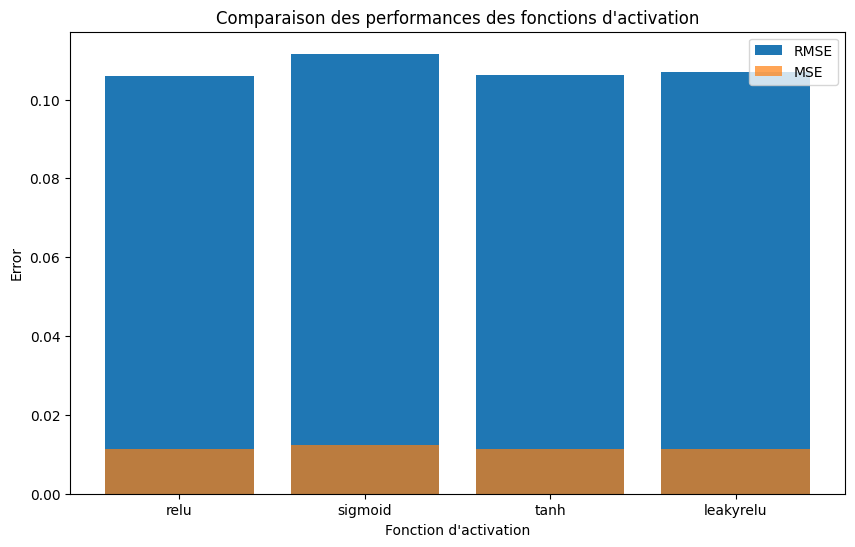

In [34]:
from keras.layers import LeakyReLU

# Sélectionner les colonnes nécessaires
X7 = df[['CO', 'Mo', 'CR', 'Deg']]
y7 = df['P1']

# Diviser les données en ensemble d'entraînement et de test
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=42)

def evaluate_activation_function(activation):
    # Créer le modèle
    model = Sequential()
    model.add(Dense(20, input_dim=4, activation=activation if activation != 'leakyrelu' else None))  # Couche d'entrée et première couche cachée
    if activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.01))   # alpha est le paramètre de pente
    model.add(Dense(20, activation=activation if activation != 'leakyrelu' else None))  # Seconde couche cachée
    if activation == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1))  # Couche de sortie
    
    # Compiler le modèle
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Entraîner le modèle
    model.fit(X7_train, y7_train, epochs=10, batch_size=10, verbose=0)  # 10 epochs, pas de sortie

    # Prédictions
    predictions = model.predict(X7_test).flatten()

    # Calculer MSE et RMSE
    mse = mean_squared_error(y7_test, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y7_test, predictions)

    return mse, rmse, r_squared

# Liste des fonctions d'activation à tester
activations = ['relu', 'sigmoid', 'tanh', 'leakyrelu']

# Tester chaque fonction d'activation
results = {}
for activation in activations:
    mse, rmse, r_squared = evaluate_activation_function(activation)
    results[activation] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r_squared}

# Afficher les résultats pour chaque fonction d'activation
for activation, metrics in results.items():
    print(f"Activation: {activation} - MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R-squared: {metrics['R-squared']}")

# Déterminer la meilleure fonction d'activation basée sur RMSE
best_activation = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best activation function based on RMSE: {best_activation}")

# Diagramme à barres pour comparer les performances RMSE et MSE des différentes fonctions d'activation
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [results[key]['RMSE'] for key in results], label='RMSE')
plt.bar(results.keys(), [results[key]['MSE'] for key in results], label='MSE', alpha=0.7)
plt.xlabel('Fonction d\'activation')
plt.ylabel('Error')
plt.title("Comparaison des performances des fonctions d\'activation")
plt.legend()
plt.show()


Nous pouvons constater : 
- La meilleure fonction d'activation pour notre problème de régression est donc LeakyReLU. 
- Remarque : les différences de performance entre les fonctions d'activations dans notre problème ne sont pas marquantes.

Dans l’optique d’améliorer encore nos performances et sachant que nous avons utilisé un réseau de neurones séquentiel, peut-être pouvons-nous trouver un meilleur réseau de neurones adapté à notre problème.  